
Call:
lm(formula = cons ~ inc + inflat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0491 -2.1273  0.4948  2.3026  8.6025 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -147.38977   21.71937  -6.786 2.26e-10 ***
inc            1.15263    0.02431  47.420  < 2e-16 ***
inflat        -2.47468    0.20268 -12.210  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.267 on 156 degrees of freedom
Multiple R-squared:  0.9425,	Adjusted R-squared:  0.9418 
F-statistic:  1279 on 2 and 156 DF,  p-value: < 2.2e-16


inc  inflat 
1.01252 1.01252

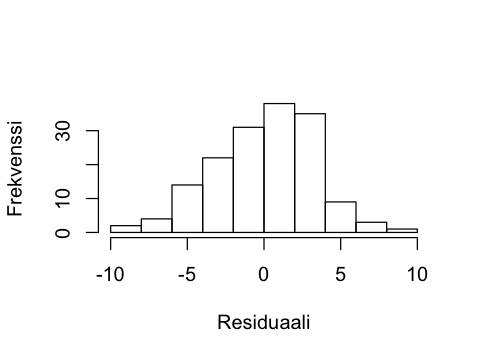

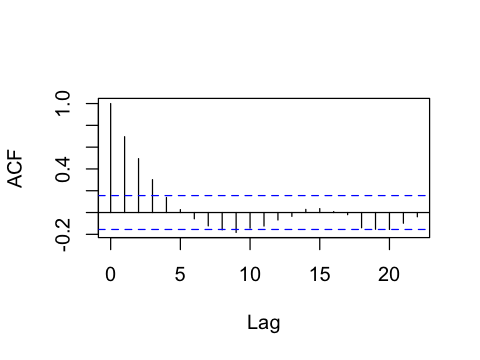

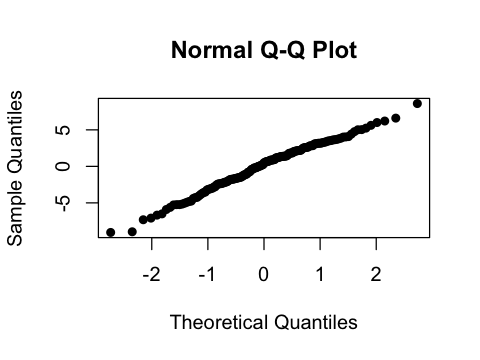

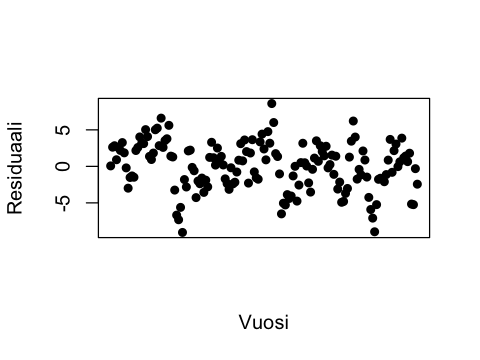

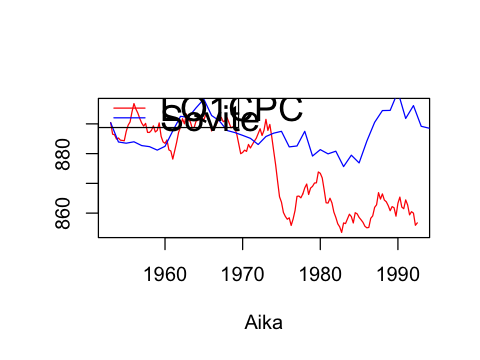

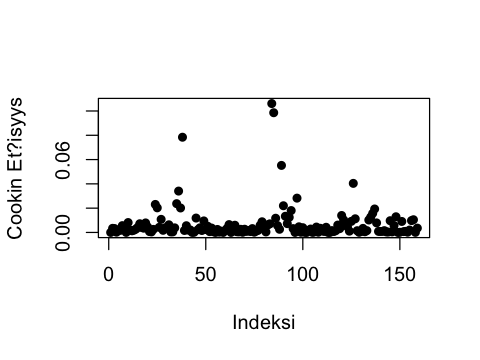


	Breusch-Godfrey test for serial correlation of order up to 10

data:  model1
LM test = 79.981, df = 10, p-value = 5.064e-13



Call:
lm(formula = dcons ~ dinc + dinflat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6284 -0.8637  0.0631  0.9223  3.9466 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.11968    0.11453  -1.045  0.29764    
dinc         0.51830    0.03527  14.696  < 2e-16 ***
dinflat     -0.71594    0.23934  -2.991  0.00323 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.437 on 155 degrees of freedom
Multiple R-squared:  0.5826,	Adjusted R-squared:  0.5772 
F-statistic: 108.2 on 2 and 155 DF,  p-value: < 2.2e-16


dinc  dinflat 
1.064351 1.064351

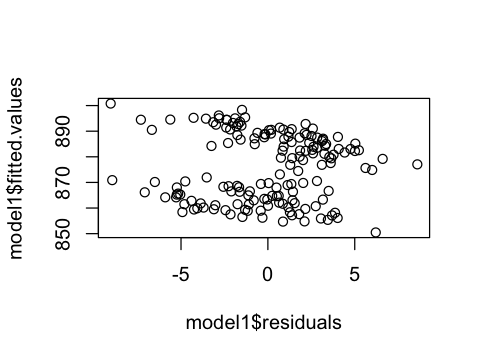

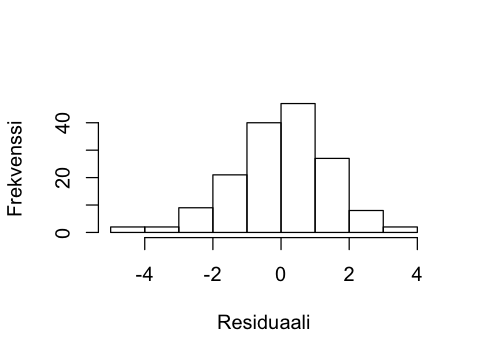

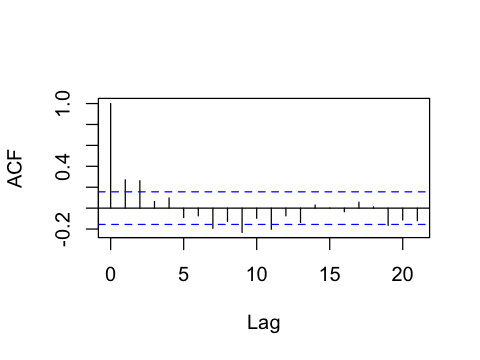

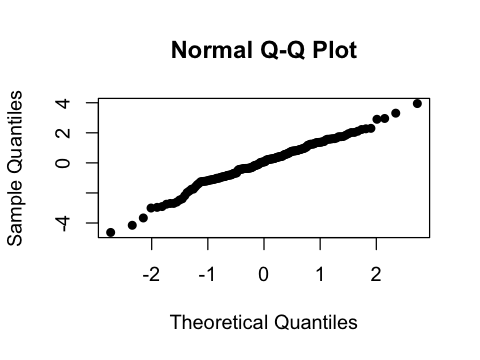

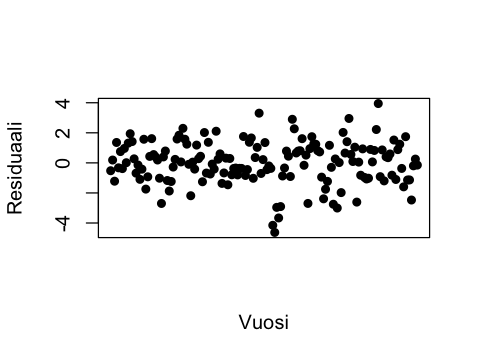

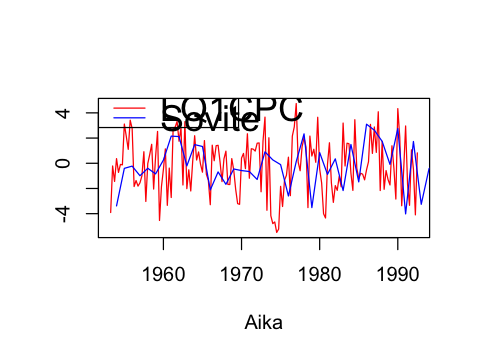

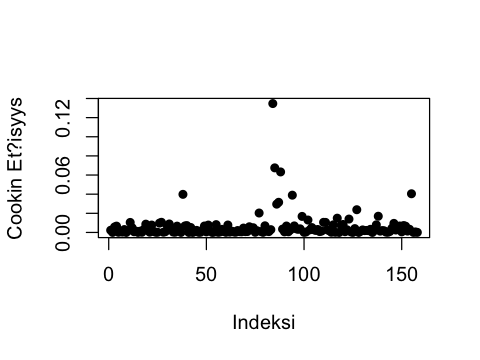


	Breusch-Godfrey test for serial correlation of order up to 10

data:  modelD
LM test = 26.627, df = 10, p-value = 0.002982



Call:
lm(formula = cons[-1] ~ dcons + inc[-1] + dinc + inflat[-1] + 
    dinflat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8010 -1.8783  0.0958  2.0866  7.0093 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -139.90191   19.09672  -7.326 1.30e-11 ***
dcons         -0.31994    0.17774  -1.800   0.0738 .  
inc[-1]        1.14528    0.02134  53.661  < 2e-16 ***
dinc          -0.34644    0.10900  -3.178   0.0018 ** 
inflat[-1]    -3.05881    0.20786 -14.716  < 2e-16 ***
dinflat        2.44239    0.48313   5.055 1.22e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.759 on 152 degrees of freedom
Multiple R-squared:  0.9598,	Adjusted R-squared:  0.9584 
F-statistic: 725.2 on 5 and 152 DF,  p-value: < 2.2e-16


dcons    inc[-1]       dinc inflat[-1]    dinflat 
  3.183628   1.078210   2.758545   1.473533   1.176794

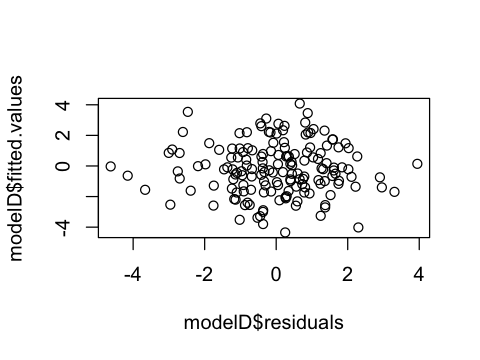

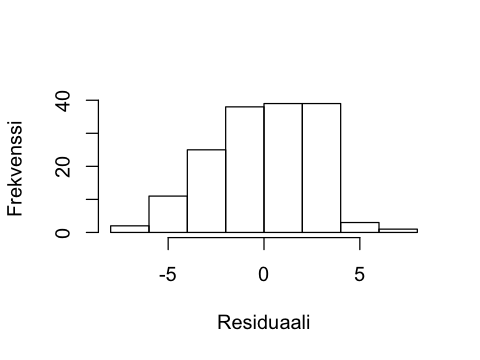

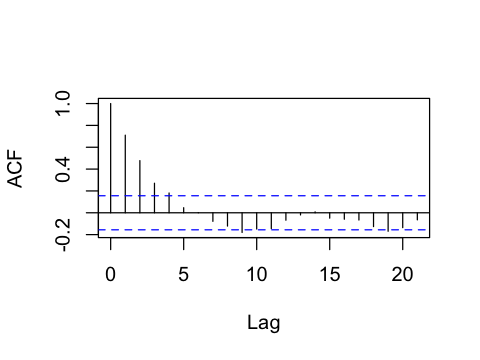

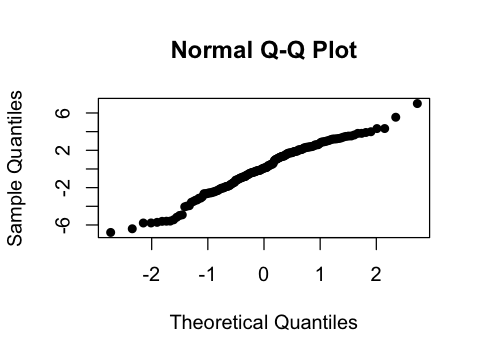

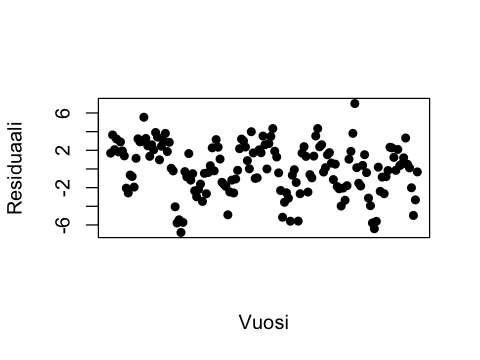

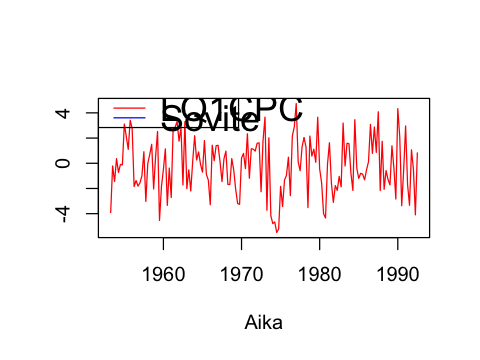

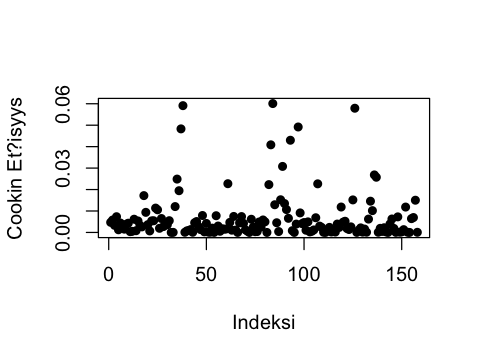


	Breusch-Godfrey test for serial correlation of order up to 10

data:  model3
LM test = 102.55, df = 10, p-value < 2.2e-16


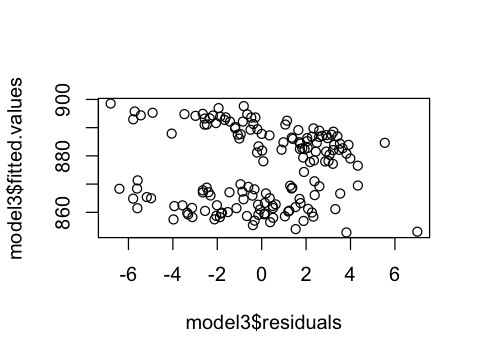

In [10]:
library(car)
library(lmtest)
library(repr)
options(repr.plot.width=4, repr.plot.height=3)

t38 <- read.table("t38.txt",header = T)
cons <- ts(t38$CONS, start = 1953, frequency = 4)
inc <- ts(t38$INC, start = 1953, frequency = 4)
inflat <- ts(t38$INFLAT, start = 1953, frequency = 4)
model1 <- lm(cons~inc+inflat)
summary(model1)
#pienet p-arvot, selitt?vyys 94% - ei hyv?
vif(model1) # pienet
hist(model1$residuals,xlab="Residuaali",ylab="Frekvenssi",main=" ")
#normaali-j
acf(model1$residuals,main="")
qqnorm(model1$residuals,pch=16)
plot(model1$residuals,type="p",ylab="Residuaali",xlab="Vuosi",pch=16,xaxt="n")
#aika hajallaan
pred1 <- ts(predict(model1),start=1953)
plot(cons,col="red",xlab="Aika",ylab="")
lines(pred1,col="blue")
#ompa huono
legend("topleft", legend=c("LQ1CPC", "Sovite"), col=c("red","blue"),lty=c(1,1),cex=1.8)
plot(cooks.distance(model1),ylab="Cookin Et?isyys",xlab="Indeksi", pch=16)
plot(model1$residuals,model1$fitted.values)
bgtest(model1,order = 10)
#korrelaatiota, ei hyv?
#paska malli - en ostais

dcons <- diff(cons)
dinc <- diff(inc)
dinflat <- diff(inflat)
modelD <- lm(dcons~dinc+dinflat)
summary(modelD)
#selitt?vyysaste 58%, huono homma
vif(modelD) # pienet
hist(modelD$residuals,xlab="Residuaali",ylab="Frekvenssi",main=" ")
#normaali-j
acf(modelD$residuals,main="")
qqnorm(modelD$residuals,pch=16)
plot(modelD$residuals,type="p",ylab="Residuaali",xlab="Vuosi",pch=16,xaxt="n")
#v?hemm?n hajallaan
pred2 <- ts(predict(modelD),start=1954)
plot(dcons,col="red",xlab="Aika",ylab="")
lines(pred2,col="blue")
#ompa huono
legend("topleft", legend=c("LQ1CPC", "Sovite"), col=c("red","blue"),lty=c(1,1),cex=1.8)
plot(cooks.distance(modelD),ylab="Cookin Et?isyys",xlab="Indeksi", pch=16)
plot(modelD$residuals,modelD$fitted.values)
bgtest(modelD,order = 10)
#korrelaatiota, ei hyv?
#paska malli - en ostais


model3 <- lm(cons[-1]~dcons+inc[-1]+dinc+inflat[-1]+dinflat)
summary(model3)
#selitt?vyysaste 95%, hyv? homma
vif(model3) # pienet
hist(model3$residuals,xlab="Residuaali",ylab="Frekvenssi",main=" ")
#ei ihan normaali-j
acf(model3$residuals,main="")
qqnorm(model3$residuals,pch=16)
plot(model3$residuals,type="p",ylab="Residuaali",xlab="Vuosi",pch=16,xaxt="n")
#v?hemm?n hajallaan
pred3 <- ts(predict(model3))
plot(dcons,col="red",xlab="Aika",ylab="")
lines(pred3,col="blue")
#ompa huono
legend("topleft", legend=c("LQ1CPC", "Sovite"), col=c("red","blue"),lty=c(1,1),cex=1.8)
plot(cooks.distance(model3),ylab="Cookin Et?isyys",xlab="Indeksi", pch=16)
plot(model3$residuals,model3$fitted.values)
bgtest(model3,order = 10)
#pieni p-arvo